In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv ("D:/7th Sem/Minor Project/Lung_Cancer_Dataset4.csv")

In [85]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [86]:
df.shape

(609, 16)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 609 non-null    object
 1   AGE                    609 non-null    int64 
 2   SMOKING                609 non-null    int64 
 3   YELLOW_FINGERS         609 non-null    int64 
 4   ANXIETY                609 non-null    int64 
 5   PEER_PRESSURE          609 non-null    int64 
 6   CHRONIC_DISEASE        609 non-null    int64 
 7   FATIGUE                609 non-null    int64 
 8   ALLERGY                609 non-null    int64 
 9   WHEEZING               609 non-null    int64 
 10  ALCOHOL_CONSUMING      609 non-null    int64 
 11  COUGHING               609 non-null    int64 
 12  SHORTNESS_OF_BREATH    609 non-null    int64 
 13  SWALLOWING_DIFFICULTY  609 non-null    int64 
 14  CHEST_PAIN             609 non-null    int64 
 15  LUNG_CANCER            

In [88]:
df.isna().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [89]:
df.drop_duplicates(inplace=True)


In [90]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [91]:
df.shape


(576, 16)

In [92]:
# Mapping the values
binary_mapping = {1: 0, 2: 1}
df.replace(binary_mapping, inplace=True)

gender_mapping = {'M': 1, 'F': 2}
lung_cancer_mapping = {'NO': 0, 'YES': 1}

df['GENDER'] = df['GENDER'].map(gender_mapping)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map(lung_cancer_mapping)

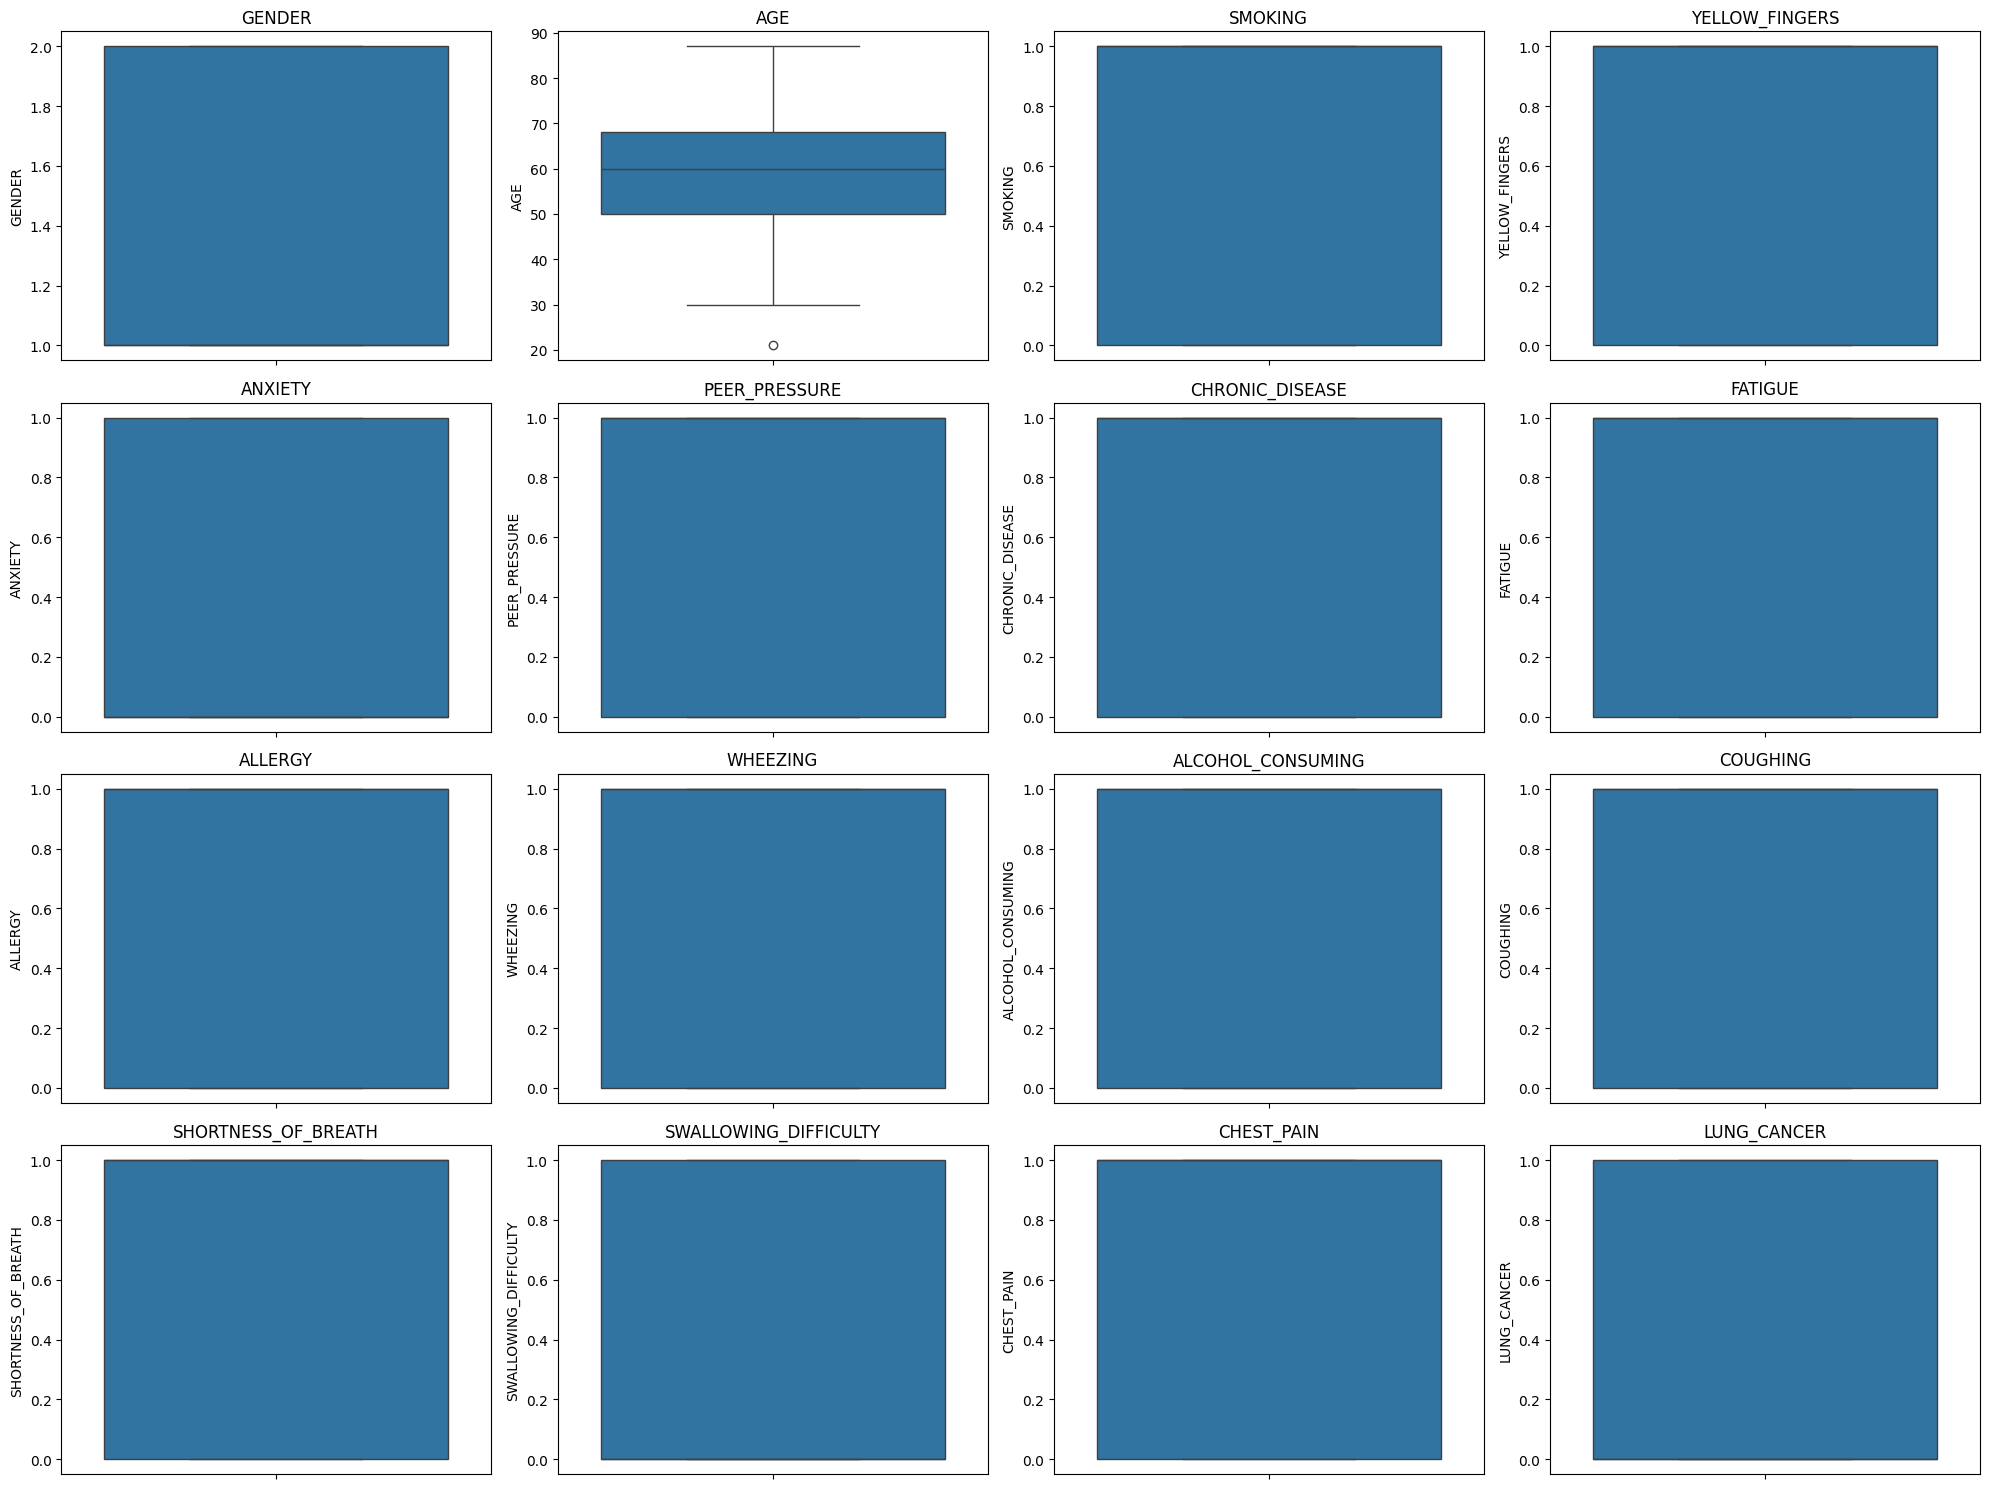

In [93]:
# Plotting box plots for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

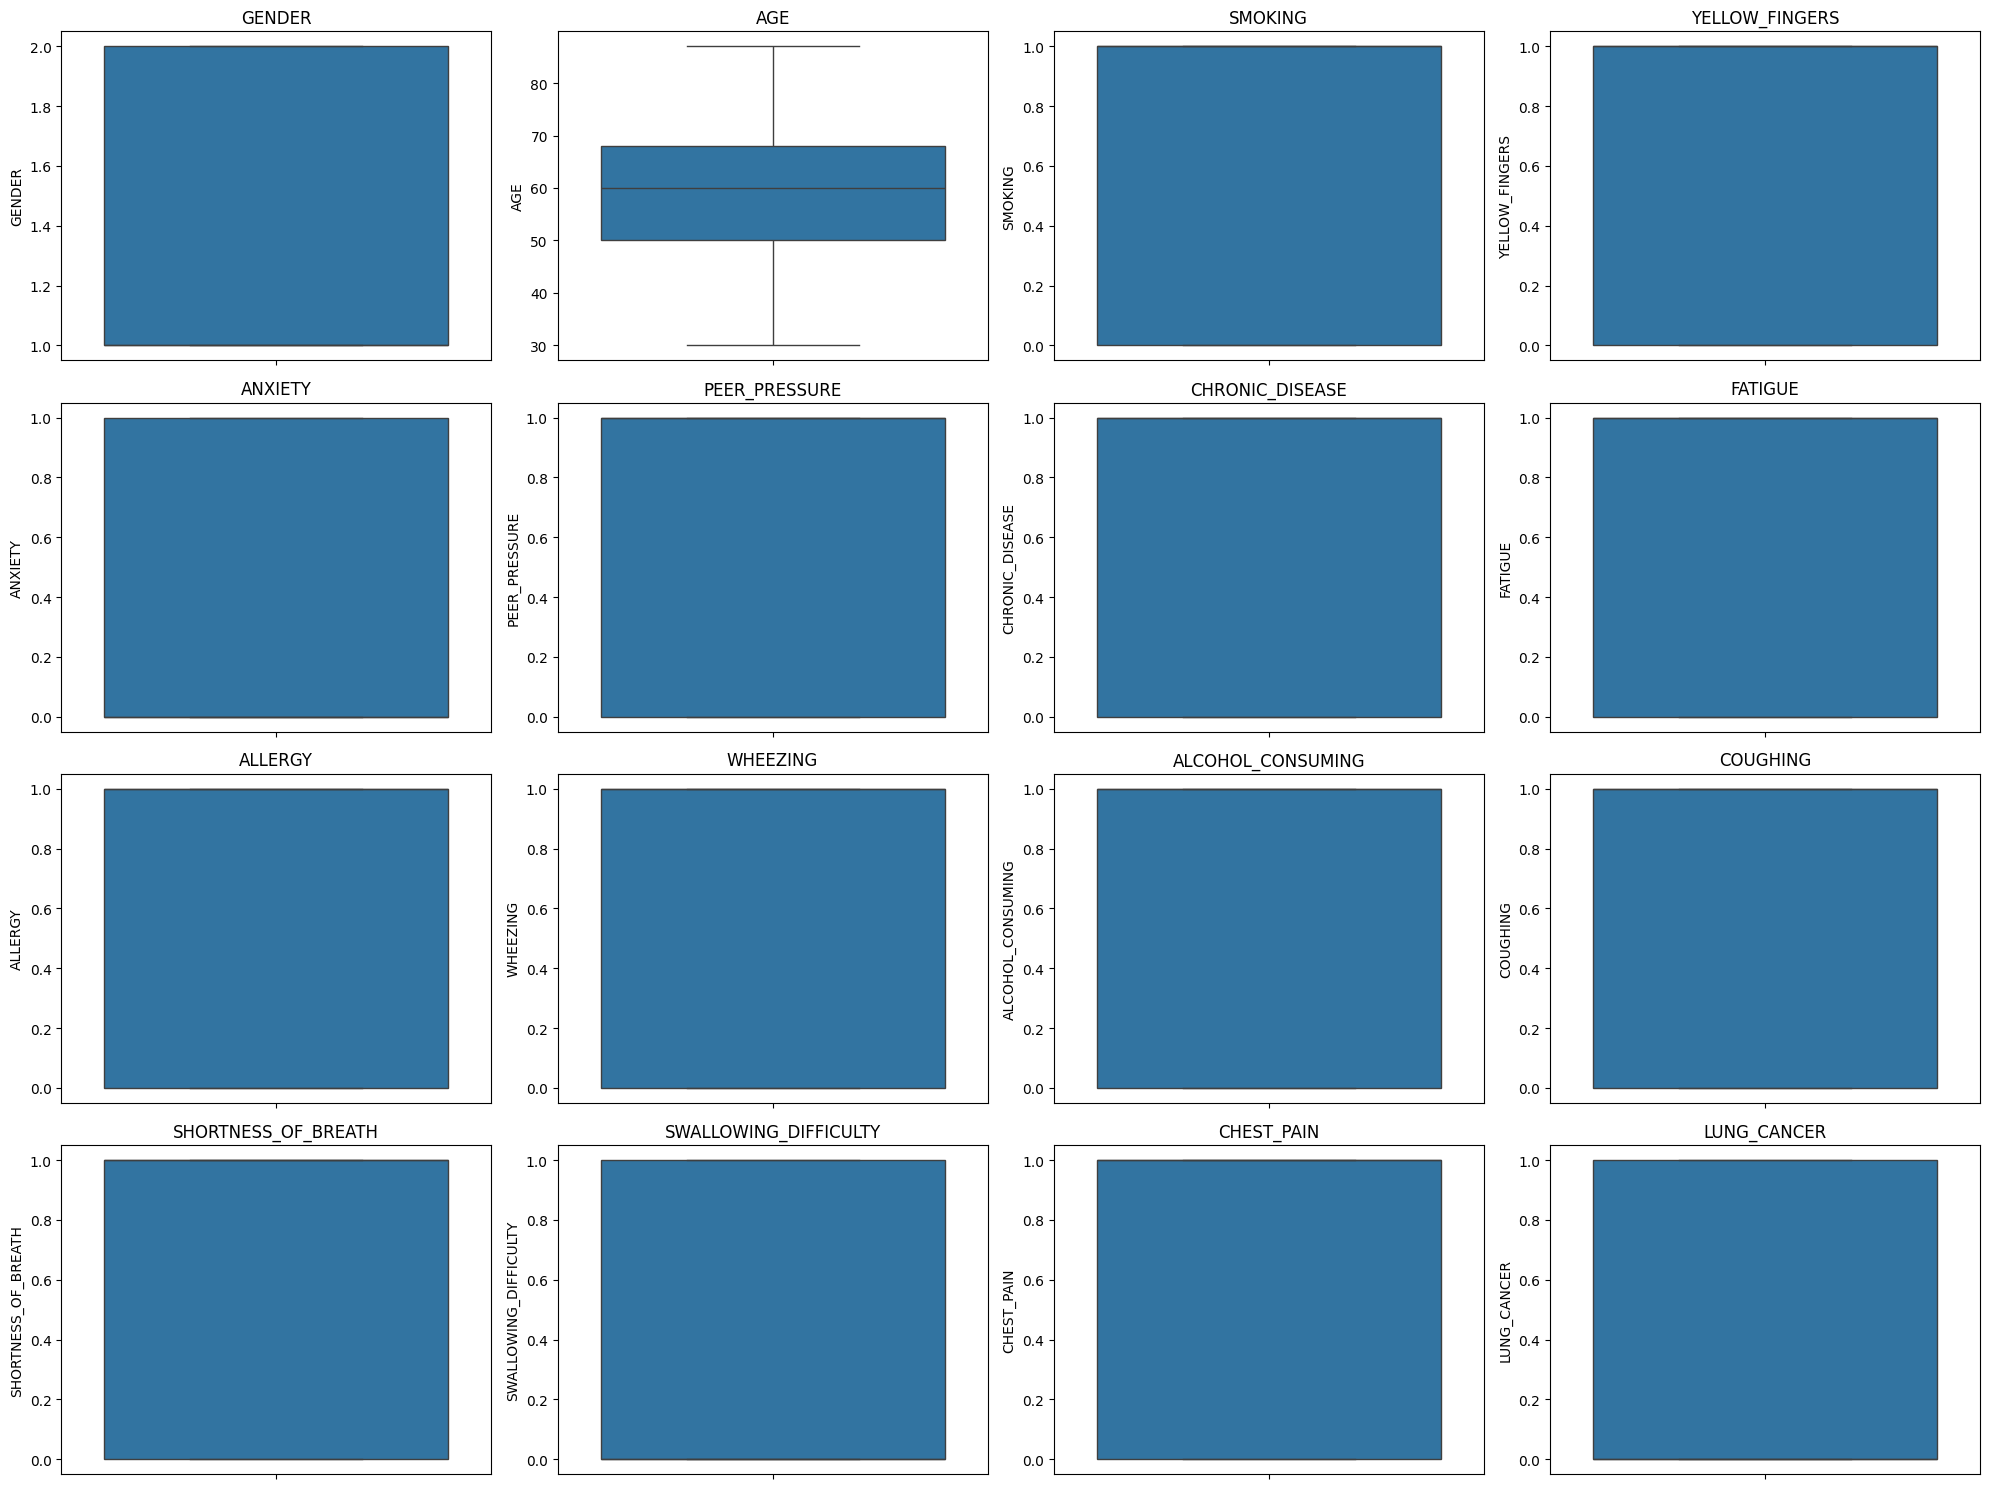

In [94]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
df = remove_outliers(df)

# Plotting box plots for each feature without outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


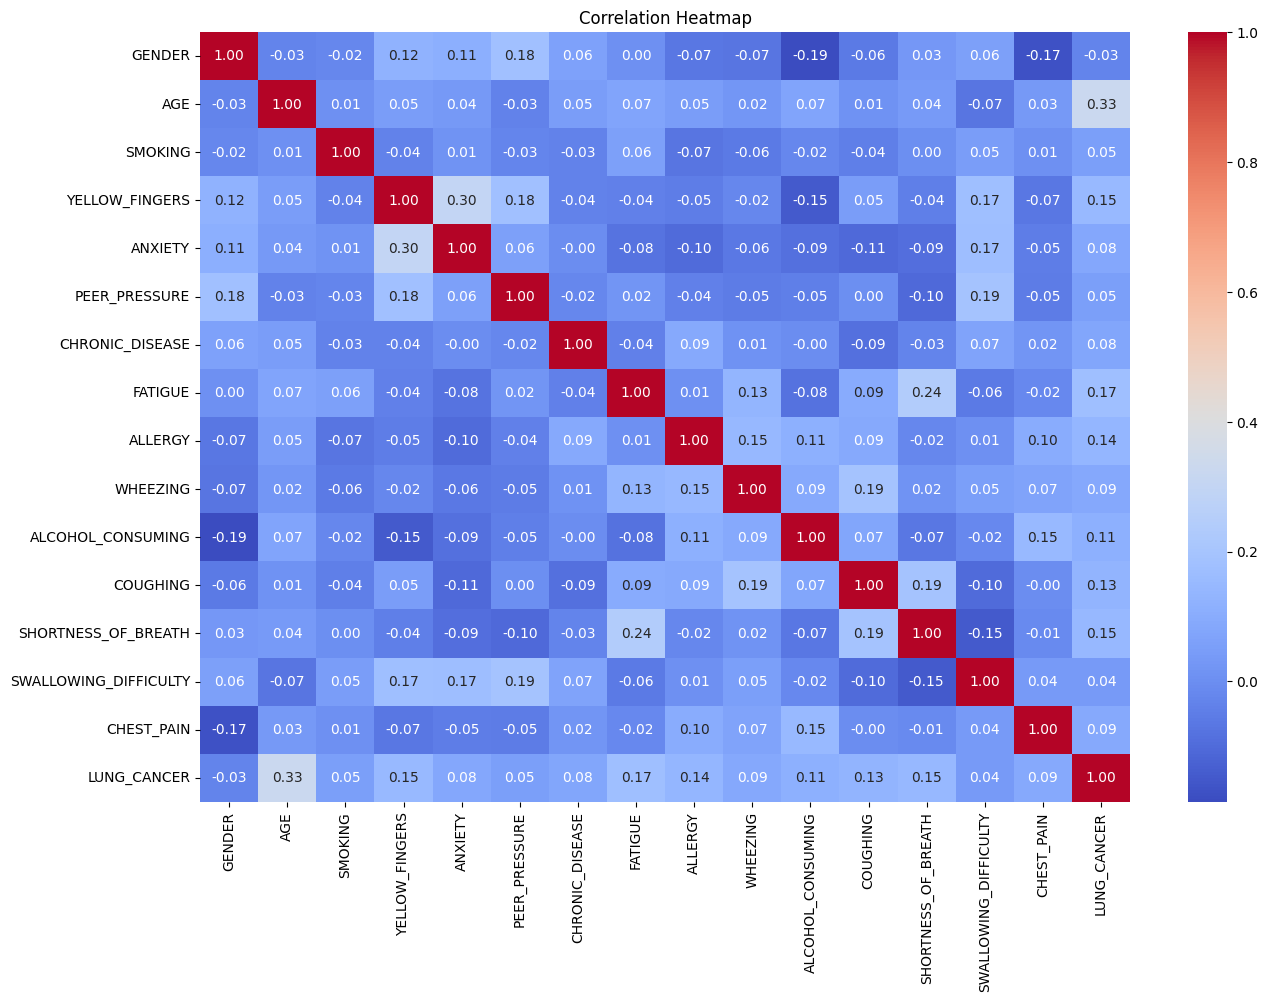

In [95]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [96]:
df2 = pd.DataFrame(df)

# Mapping coded values to real names
df2['GENDER'] = df2['GENDER'].map({1: 'Male', 2: 'Female'})
df2['SMOKING'] = df2['SMOKING'].map({0: 'Non-Smoker', 1: 'Smoker'})
df2['LUNG_CANCER'] = df2['LUNG_CANCER'].map({0: 'No', 1: 'Yes'})


In [97]:
# Plotly Box Plot for Age Distribution by Smoking Status
fig3 = px.box(df2, x='SMOKING', y='AGE', title='Age Distribution by Smoking Status')
fig3.show()


In [98]:
print(df2[['SMOKING', 'AGE']].head())


      SMOKING  AGE
0  Non-Smoker   69
1      Smoker   74
2  Non-Smoker   59
3      Smoker   63
4  Non-Smoker   63


In [99]:
try:
    fig3 = px.box(df2, x='SMOKING', y='AGE', title='Age Distribution by Smoking Status')
    fig3.show()
except Exception as e:
    print(f"Error: {e}")
    

In [100]:
# Plotly Pie Chart for Lung Cancer Distribution
fig2 = px.pie(df2, names='LUNG_CANCER', title='Lung Cancer Distribution')
fig2.show()

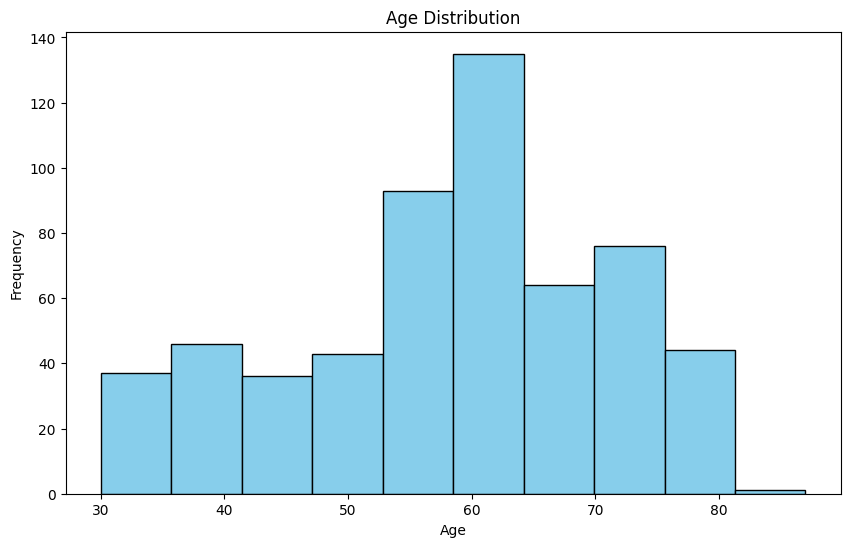

In [101]:
# Histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(df2['AGE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

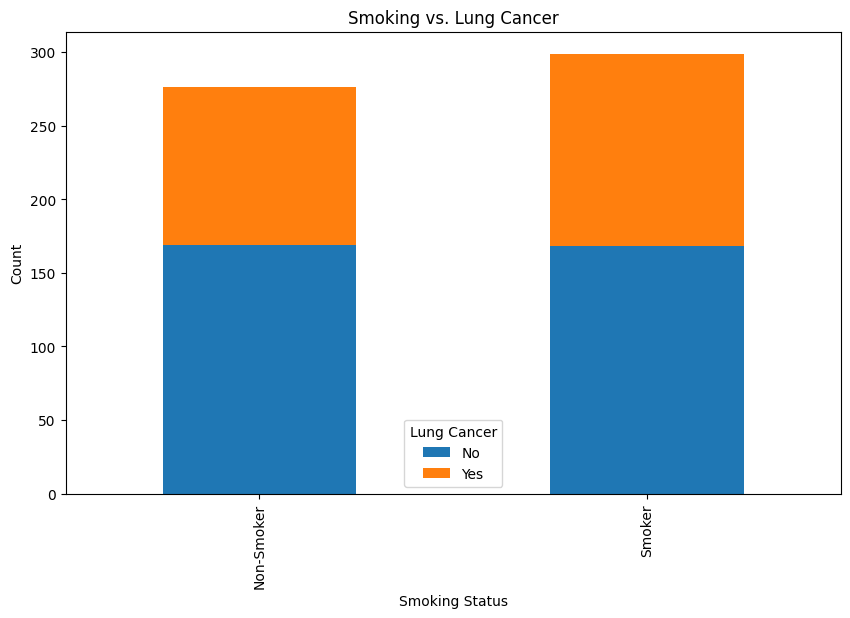

In [102]:
# Bar Plot for Smoking vs. Lung Cancer
smoking_lung_cancer = df2.groupby('SMOKING')['LUNG_CANCER'].value_counts().unstack()
smoking_lung_cancer.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking vs. Lung Cancer')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

In [103]:
# Plotly Box Plot for Age Distribution by Smoking Status
fig3 = px.box(df2, x='SMOKING', y='AGE', title='Age Distribution by Smoking Status')
fig3.show()

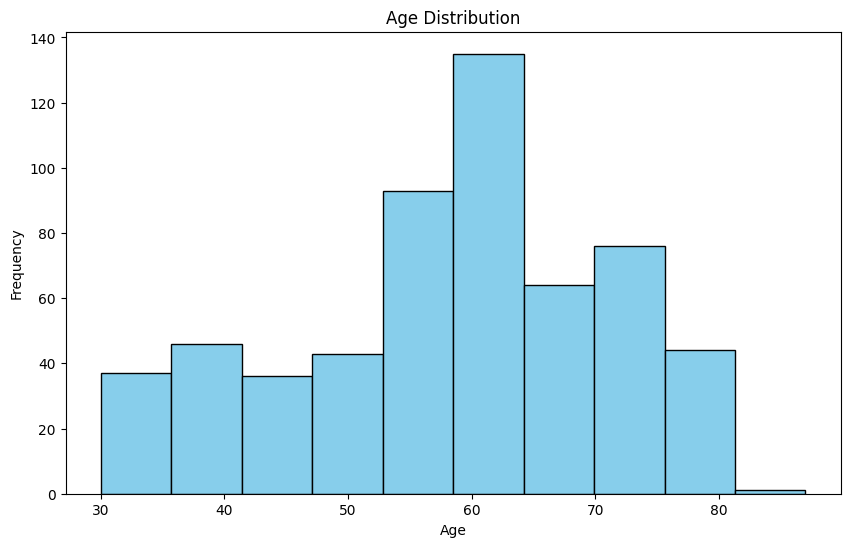

In [104]:
# Histogram for Age
plt.figure(figsize=(10, 6))
plt.hist(df2['AGE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



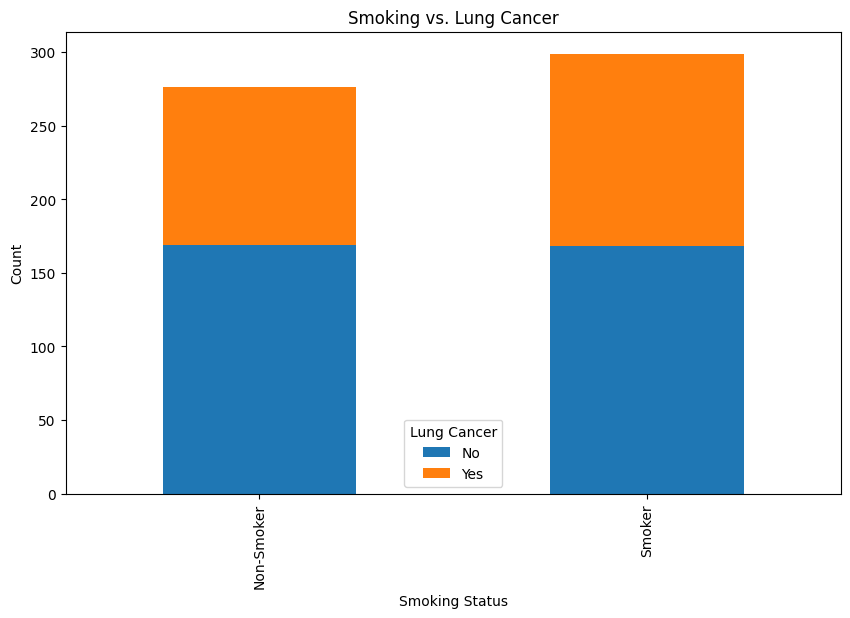

In [105]:
# Bar Plot for Smoking vs. Lung Cancer
smoking_lung_cancer = df2.groupby('SMOKING')['LUNG_CANCER'].value_counts().unstack()
smoking_lung_cancer.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking vs. Lung Cancer')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()


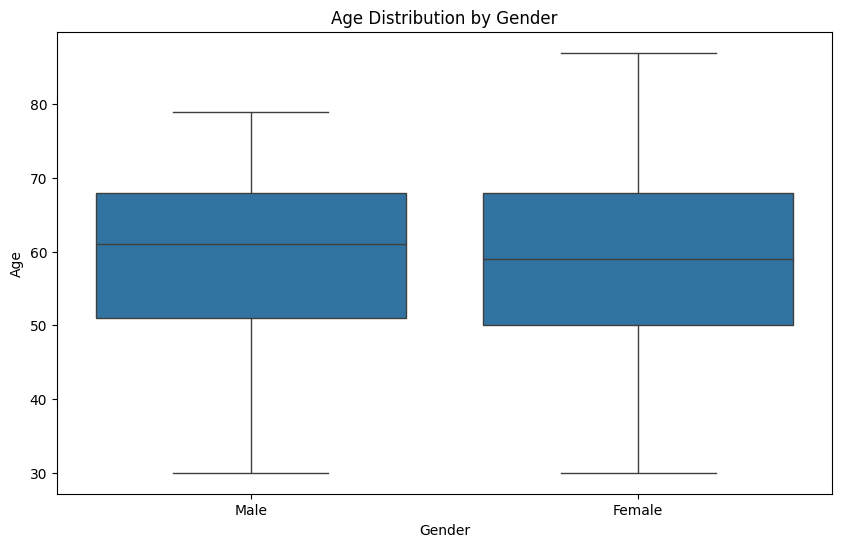

In [106]:
# Box Plot for Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='GENDER', y='AGE', data=df2)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [107]:
# Plotly Histogram for Age Distribution
fig_histogram = px.histogram(df2, x='AGE', title='Age Distribution')
fig_histogram.show()


In [108]:
# Plotly Sunburst Chart for Gender and Smoking Status in Relation to Lung Cancer
fig_sunburst = px.sunburst(
    df2,
    path=['GENDER', 'SMOKING', 'LUNG_CANCER'],
    title='Gender and Smoking Status in Relation to Lung Cancer'
)
fig_sunburst.show()

In [109]:
# Plotly Violin Plot for Age Distribution by Anxiety Status and Peer Pressure
fig_violin = px.violin(df2, y='AGE', x='ANXIETY', color='PEER_PRESSURE', box=True, points="all",
                       title='Age Distribution by Anxiety Status and Peer Pressure')
fig_violin.update_layout(xaxis_title='Anxiety Status (0: No, 1: Yes)', yaxis_title='Age')
fig_violin.show()

In [110]:
import pickle

In [111]:
file_path = 'D:\7th Sem\Minor Project\gradient_boosting_model.pkl'

In [112]:
with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)|


SyntaxError: invalid syntax (2442640409.py, line 2)

In [113]:
from sklearn.ensemble import GradientBoostingClassifier


In [114]:

model_gbm = GradientBoostingClassifier(random_state=42)

****XGBOOST****

Accuracy: 0.76
Precision: 0.69
Recall: 0.82
F1 Score: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        64
           1       0.69      0.82      0.75        51

    accuracy                           0.76       115
   macro avg       0.76      0.76      0.76       115
weighted avg       0.77      0.76      0.76       115

Confusion Matrix:
[[45 19]
 [ 9 42]]


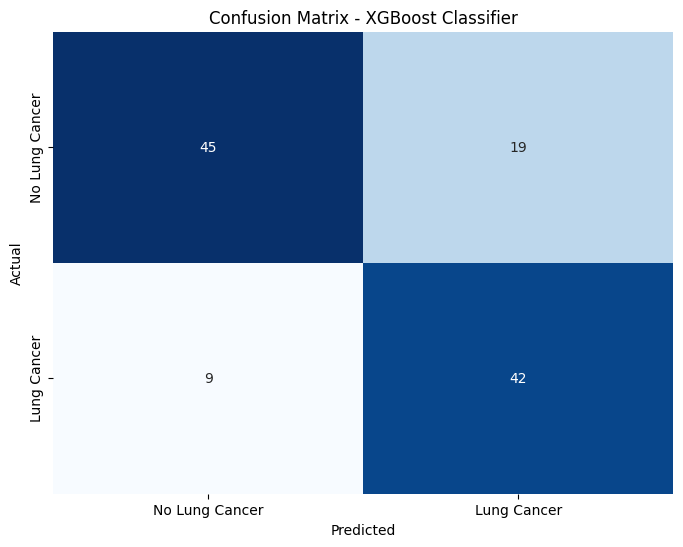

In [115]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Separate features (X) and target variable (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost classifier
model_xgb = XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)
# Predict on the test set
y_pred = model_xgb.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1score_xgb = f1_score(y_test, y_pred)
classification_report_xgb = classification_report(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1 Score: {f1score_xgb:.2f}")
print("Classification Report:")
print(classification_report_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


In [116]:
# X.isnan.sum()

Accuracy: 0.77
Precision: 0.71
Recall: 0.78
F1 Score: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        64
           1       0.71      0.78      0.75        51

    accuracy                           0.77       115
   macro avg       0.76      0.77      0.76       115
weighted avg       0.77      0.77      0.77       115

Confusion Matrix:
[[48 16]
 [11 40]]


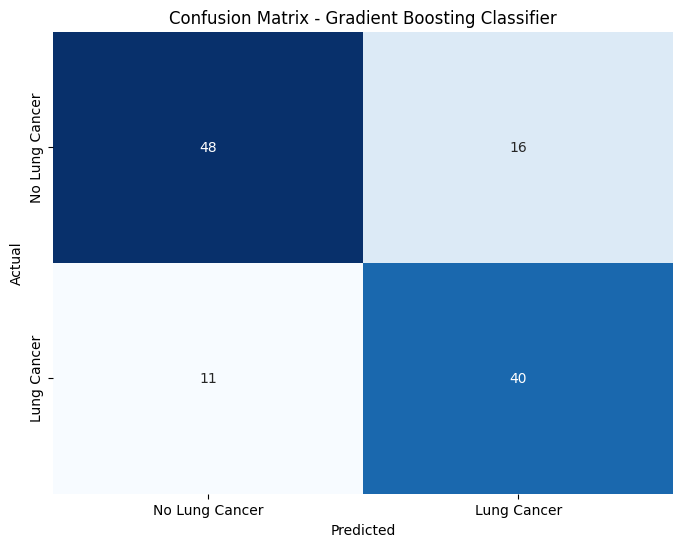

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(random_state=42)

# Train the model
model_gbm.fit(X_train, y_train)

# Now predict on the test set
y_pred = model_gbm.predict(X_test)

# Calculate evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred)
precision_gbm = precision_score(y_test, y_pred)
recall_gbm = recall_score(y_test, y_pred)
f1score_gbm = f1_score(y_test, y_pred)
classification_report_gbm = classification_report(y_test, y_pred)
conf_matrix_gbm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_gbm:.2f}")
print(f"Precision: {precision_gbm:.2f}")
print(f"Recall: {recall_gbm:.2f}")
print(f"F1 Score: {f1score_gbm:.2f}")
print("Classification Report:")
print(classification_report_gbm)
print("Confusion Matrix:")
print(conf_matrix_gbm)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

Accuracy: 0.84
Precision: 0.78
Recall: 0.90
F1 Score: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        64
           1       0.78      0.90      0.84        51

    accuracy                           0.84       115
   macro avg       0.85      0.85      0.84       115
weighted avg       0.85      0.84      0.84       115

Confusion Matrix:
[[51 13]
 [ 5 46]]


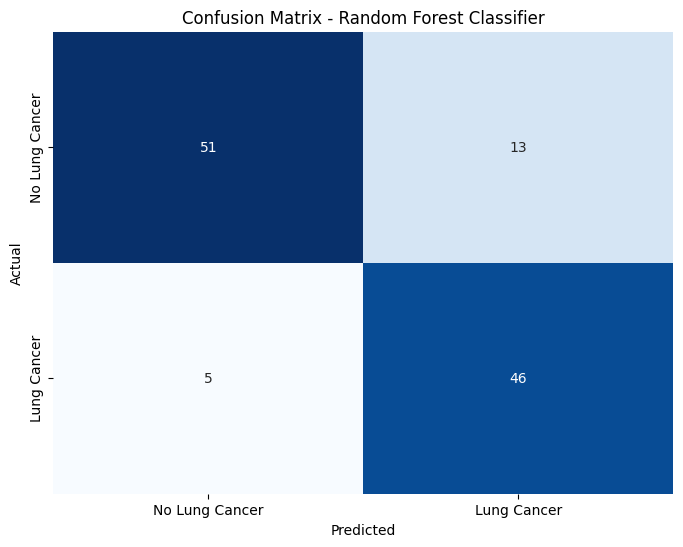

In [118]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)
# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1score_rf = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1score_rf:.2f}")
print("Classification Report:")
print(classification_report_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1score_rf = f1_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1score_rf:.2f}")
print("Classification Report:")
print(classification_report_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Feature Importance - Random Forest')
plt.show()


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: 

Accuracy: 0.65
Precision: 0.72
Recall: 0.70
F1 Score: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        52
           1       0.72      0.70      0.71        83

    accuracy                           0.65       135
   macro avg       0.64      0.64      0.64       135
weighted avg       0.66      0.65      0.65       135

Confusion Matrix:
[[30 22]
 [25 58]]


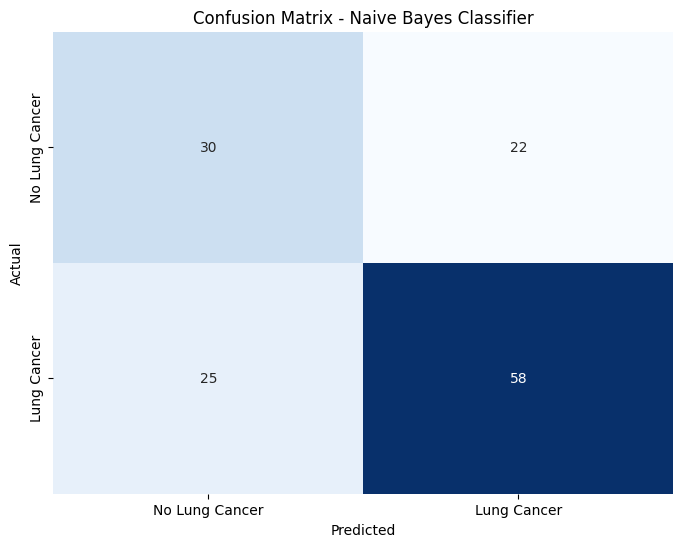

In [120]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = model_nb.predict(X_test)

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1score_nb = f1_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1score_nb:.2f}")
print("Classification Report:")
print(classification_report_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()


In [121]:
import pickle

# Assuming 'model' is your trained machine learning model (e.g., a model from scikit-learn)
model = model_rf  # Replace with your model variable if different

# Save the model to a pickle file
with open('model_RF.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully to 'model_RF.pkl'")


Model saved successfully to 'model_RF.pkl'


In [ ]:
import joblib

# Load the model from the file
loaded_model = joblib.load('model_RF.pkl')

# Function to convert user input to model input
def convert_user_input(gender, age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain):
    gender = 1 if gender.lower() == 'male' else 2
    smoking = 1 if smoking.lower() == 'yes' else 0
    yellow_fingers = 1 if yellow_fingers.lower() == 'yes' else 0
    anxiety = 1 if anxiety.lower() == 'yes' else 0
    peer_pressure = 1 if peer_pressure.lower() == 'yes' else 0
    chronic_disease = 1 if chronic_disease.lower() == 'yes' else 0
    fatigue = 1 if fatigue.lower() == 'yes' else 0
    allergy = 1 if allergy.lower() == 'yes' else 0
    wheezing = 1 if wheezing.lower() == 'yes' else 0
    alcohol_consuming = 1 if alcohol_consuming.lower() == 'yes' else 0
    coughing = 1 if coughing.lower() == 'yes' else 0
    shortness_of_breath = 1 if shortness_of_breath.lower() == 'yes' else 0
    swallowing_difficulty = 1 if swallowing_difficulty.lower() == 'yes' else 0
    chest_pain = 1 if chest_pain.lower() == 'yes' else 0

    return [gender, age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain]

# Function to predict lung cancer based on user input
def predict_lung_cancer(user_input):
    # Assuming user_input is a list of feature values
    prediction = loaded_model.predict([user_input])
    print(prediction
          )
    return "You have Lung Cancer" if prediction[0] == 1 else "You don't have Lung Cancer"

# Get user input dynamically
def get_user_input():
    gender = input("Enter gender (male/female): ")
    age = int(input("Enter age: "))
    smoking = input("Do you smoke? (yes/no): ")
    yellow_fingers = input("Do you have yellow fingers? (yes/no): ")
    anxiety = input("Do you have anxiety? (yes/no): ")
    peer_pressure = input("Do you experience peer pressure? (yes/no): ")
    chronic_disease = input("Do you have a chronic disease? (yes/no): ")
    fatigue = input("Do you experience fatigue? (yes/no): ")
    allergy = input("Do you have allergies? (yes/no): ")
    wheezing = input("Do you wheeze? (yes/no): ")
    alcohol_consuming = input("Do you consume alcohol? (yes/no): ")
    coughing = input("Do you cough? (yes/no): ")
    shortness_of_breath = input("Do you have shortness of breath? (yes/no): ")
    swallowing_difficulty = input("Do you have difficulty swallowing? (yes/no): ")
    chest_pain = input("Do you have chest pain? (yes/no): ")

    return convert_user_input(
        gender, age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain
    )

# Get user input
user_input = get_user_input()

# Make prediction
result = predict_lung_cancer(user_input)
print(result)


KeyboardInterrupt: Interrupted by user